## Rozdział 8: Uczenie Zespołowe i Lasy Losowe

### 8.1 Wprowadzenie

Uczenie zespołowe (ang. ensemble learning) to technika uczenia maszynowego, która polega na łączeniu prognoz wielu modeli bazowych w celu poprawy ogólnej wydajności i stabilności predykcji. Lasy losowe (ang. random forests) to popularna metoda zespołowa, która łączy wiele drzew decyzyjnych, aby osiągnąć lepszą dokładność i ograniczyć ryzyko przeuczenia.

### 8.2 Podstawowe Koncepcje Uczenia Zespołowego

#### 8.2.1 Uczenie Zespołowe

Uczenie zespołowe polega na tworzeniu wielu modeli bazowych i łączeniu ich wyników w jeden końcowy wynik. Techniki uczenia zespołowego można podzielić na dwie główne kategorie:

- **Bagging (Bootstrap Aggregating):** Polega na trenowaniu wielu modeli na różnych losowych podpróbach danych treningowych i łączeniu ich prognoz poprzez uśrednianie (dla regresji) lub głosowanie większościowe (dla klasyfikacji). Przykładem baggingu są lasy losowe.
  
- **Boosting:** Polega na trenowaniu modeli sekwencyjnie, gdzie każdy kolejny model stara się poprawić błędy swojego poprzednika. Przykłady algorytmów boostingowych to AdaBoost i Gradient Boosting.

#### 8.2.2 Lasy Losowe

Lasy losowe to metoda baggingu, która tworzy wiele drzew decyzyjnych na losowych podpróbach danych treningowych i losowych podzbiorach cech. Wyniki poszczególnych drzew są łączone, aby uzyskać bardziej stabilne i dokładne przewidywania.

### 8.3 Algorytm Lasów Losowych

#### 8.3.1 Budowa Lasów Losowych

1. **Losowanie Podpróbek:** Z oryginalnego zbioru danych losowane są podpróbki za pomocą próbkowania z powtórzeniem (bootstrap).
2. **Budowa Drzew:** Każde drzewo decyzyjne jest trenowane na innej podpróbie danych. Przy każdym podziale węzła wybierana jest losowa podgrupa cech zamiast całego zbioru cech.
3. **Łączenie Wyników:** Wyniki poszczególnych drzew są łączone poprzez uśrednianie (dla regresji) lub głosowanie większościowe (dla klasyfikacji).

#### 8.3.2 Parametry Lasów Losowych

- **n_estimators:** Liczba drzew w lesie losowym.
- **max_features:** Maksymalna liczba cech branych pod uwagę przy każdym podziale węzła.
- **max_depth:** Maksymalna głębokość drzewa.
- **min_samples_split:** Minimalna liczba próbek wymagana do podziału węzła.
- **min_samples_leaf:** Minimalna liczba próbek, które muszą znaleźć się w liściu.

### 8.4 Przykład Implementacji w Pythonie

Przykładowy kod przedstawiający implementację lasów losowych w Pythonie przy użyciu biblioteki `scikit-learn`.

```python
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Załadowanie przykładowego zbioru danych - Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Konwersja do DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trenowanie modelu lasów losowych
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Przewidywanie wartości na zestawie testowym
y_pred = forest.predict(X_test)

# Ocena modelu
print("Lasy Losowe")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Wizualizacja macierzy błędów
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Prawdziwa etykieta')
    plt.show()

# Wyświetlanie macierzy błędów
plot_confusion_matrix(y_test, y_pred, 'Lasy Losowe')
```

### 8.5 Zalety i Wady Lasów Losowych

#### 8.5.1 Zalety

- **Zmniejszone ryzyko przeuczenia:** Lasy losowe zazwyczaj mają mniejsze ryzyko przeuczenia w porównaniu do pojedynczych drzew decyzyjnych dzięki średniowaniu wyników wielu drzew.
- **Odporność na szum:** Dzięki losowemu wybieraniu próbek i cech, lasy losowe są mniej podatne na szum w danych.
- **Skuteczność na dużych zbiorach danych:** Lasy losowe mogą być efektywnie stosowane do dużych zbiorów danych z wieloma cechami.

#### 8.5.2 Wady

- **Złożoność obliczeniowa:** Trenowanie wielu drzew może być czasochłonne i wymaga dużej mocy obliczeniowej, szczególnie dla bardzo dużych zbiorów danych.
- **Interpretowalność:** Wyniki lasów losowych są trudniejsze do interpretacji w porównaniu do pojedynczych drzew decyzyjnych.

### 8.6 Zastosowania Lasów Losowych

#### 8.6.1 Wykrywanie Oszustw

Lasy losowe są często stosowane w systemach wykrywania oszustw, gdzie wiele cech transakcji jest analizowanych w celu wykrycia nietypowych wzorców zachowań.

#### 8.6.2 Analiza Genetyczna

Lasy losowe są wykorzystywane do analizy danych genetycznych, pomagając w identyfikacji genów związanych z określonymi chorobami.

#### 8.6.3 Marketing

Lasy losowe są używane w marketingu do segmentacji klientów, przewidywania odpowiedzi na kampanie marketingowe oraz analizy koszyków zakupowych.

### 8.7 Zakończenie

Uczenie zespołowe, a w szczególności lasy losowe, jest potężnym narzędziem w uczeniu maszynowym. Łącząc wyniki wielu modeli bazowych, techniki zespołowe mogą znacznie poprawić dokładność i stabilność predykcji. Lasy losowe, dzięki swojej zdolności do radzenia sobie z dużymi zbiorami danych i zmniejszonej podatności na przeuczenie, są szeroko stosowane w różnych dziedzinach, od wykrywania oszustw po analizę genetyczną. Mimo że mają swoje wady, takie jak złożoność obliczeniowa i trudności w interpretacji, ich zalety sprawiają, że są one cennym narzędziem w praktyce uczenia maszynowego.

Lasy Losowe
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



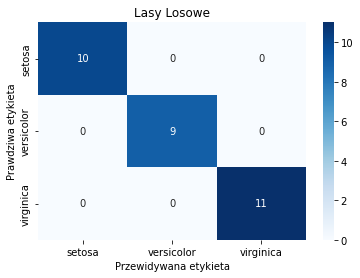

In [1]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Załadowanie przykładowego zbioru danych - Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Konwersja do DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trenowanie modelu lasów losowych
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Przewidywanie wartości na zestawie testowym
y_pred = forest.predict(X_test)

# Ocena modelu
print("Lasy Losowe")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Wizualizacja macierzy błędów
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Prawdziwa etykieta')
    plt.show()

# Wyświetlanie macierzy błędów
plot_confusion_matrix(y_test, y_pred, 'Lasy Losowe')